In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import random

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats  
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

# warnings reported for function updates, ignore them
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('genre_data.csv', encoding = 'latin-1')

In [3]:
df.head()

,track.id,track.name,track.artist,track.popularity,track.album.id,track.album.name,track.album.release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,18asYwWugKjjsihZ0YvRxO,The Motto,Tiësto,95,278z9UXJaMNDH9Bel9uAxV,The Motto,2021,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,...,7,-4.627,0,0.0435,0.03010,0.000022,0.0901,0.464,117.953,164819
1,5K6Ssv4Z3zRvxt0P6EKUAP,Heartbreak Anthem (with David Guetta & Little ...,Galantis,86,6kBuGNoOGE7uiPhN82dcJ1,Heartbreak Anthem (with David Guetta & Little ...,2021,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,...,1,-4.878,1,0.1020,0.21600,0.000000,0.0608,0.479,124.111,183726
2,73QyyUMMvtNELmULI4FOsp,You for Me,Sigala,79,2iylTVQEMYGQ9CUgn9MAAT,You for Me,2021,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,...,2,-1.856,0,0.0426,0.04810,0.000002,0.1910,0.696,126.031,175435
3,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),Dua Lipa,85,04m06KhJUuwe1Q487puIud,Levitating (feat. DaBaby),2020,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,...,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064
4,79wbJeLkXOlJh4AzaWCWfL,How Will I Know,Whitney Houston,78,0ieUgrqfmWB4Ywu2CLWNWQ,How Will I Know,2021,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,...,6,-3.591,1,0.0369,0.17800,0.000003,0.2300,0.656,118.997,213436


In [4]:
df.shape

(34080, 23)

## 1. Exploratory Data Analysis 

### 1.1 Numerical variables

In [4]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  14


,track.popularity,track.album.release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,95,2021,0.754,0.763,7,-4.627,0,0.0435,0.03010,0.000022,0.0901,0.464,117.953,164819
1,86,2021,0.595,0.784,1,-4.878,1,0.1020,0.21600,0.000000,0.0608,0.479,124.111,183726
2,79,2021,0.733,0.886,2,-1.856,0,0.0426,0.04810,0.000002,0.1910,0.696,126.031,175435
3,85,2020,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064
4,78,2021,0.761,0.739,6,-3.591,1,0.0369,0.17800,0.000003,0.2300,0.656,118.997,213436


In [5]:
# Correlation matrix
mydata = df[numerical_features]
mydata.corr()

,track.popularity,track.album.release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track.popularity,1.000000,0.004374,0.062639,-0.041678,0.001030,0.097556,-0.012660,-0.019513,0.017134,-0.171578,-0.043567,0.067637,0.001455,-0.087582
track.album.release_date,0.004374,1.000000,0.111051,0.018535,0.000445,0.169939,-0.070089,0.080756,0.014602,0.084969,-0.002643,-0.189691,0.036615,-0.212066
danceability,0.062639,0.111051,1.000000,-0.092948,0.024347,0.054735,-0.081687,0.170880,-0.056893,-0.062653,-0.131025,0.326561,-0.188164,-0.108188
energy,-0.041678,0.018535,-0.092948,1.000000,0.018101,0.669120,-0.008191,-0.057363,-0.509563,0.028860,0.163011,0.144167,0.131631,-0.023146
key,0.001030,0.000445,0.024347,0.018101,1.000000,0.005872,-0.171748,0.016332,-0.011030,0.000840,-0.010983,0.027463,-0.006354,0.010547
loudness,0.097556,0.169939,0.054735,0.669120,0.005872,1.000000,-0.022952,-0.022980,-0.376445,-0.193166,0.074042,0.096731,0.076328,-0.133389
mode,-0.012660,-0.070089,-0.081687,-0.008191,-0.171748,-0.022952,1.000000,-0.050878,0.010211,-0.019111,-0.000380,0.010621,0.018447,0.026370
speechiness,-0.019513,0.080756,0.170880,-0.057363,0.016332,-0.022980,-0.050878,1.000000,0.066719,-0.150610,0.126333,0.057939,0.016879,-0.092621
acousticness,0.017134,0.014602,-0.056893,-0.509563,-0.011030,-0.376445,0.010211,0.066719,1.000000,-0.004430,-0.041143,-0.029288,-0.103051,-0.040851
instrumentalness,-0.171578,0.084969,-0.062653,0.028860,0.000840,-0.193166,-0.019111,-0.150610,-0.004430,1.000000,-0.020432,-0.281030,0.033411,0.128072


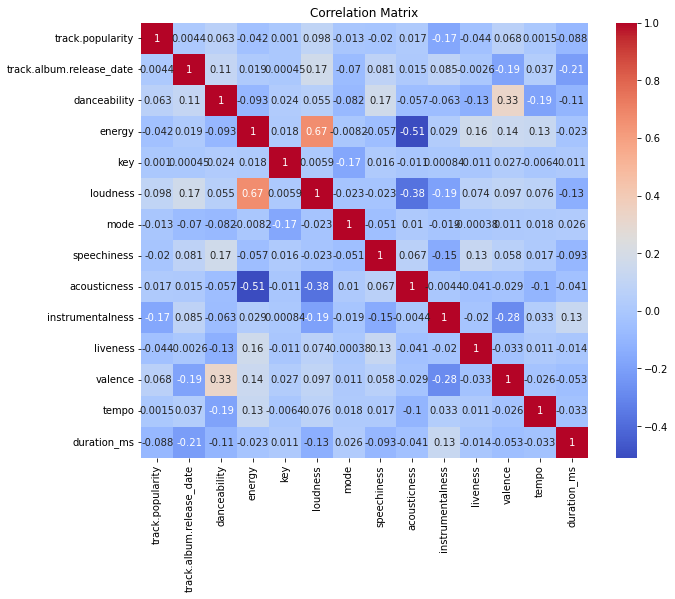

In [6]:
# heatmap
corrmatrix = mydata.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrmatrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 1.2 Categorical Variables

In [7]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
df[categorical_features].head()

,track.id,track.name,track.artist,track.album.id,track.album.name,playlist_name,playlist_id,playlist_genre,playlist_subgenre
0,18asYwWugKjjsihZ0YvRxO,The Motto,Tiësto,278z9UXJaMNDH9Bel9uAxV,The Motto,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop
1,5K6Ssv4Z3zRvxt0P6EKUAP,Heartbreak Anthem (with David Guetta & Little ...,Galantis,6kBuGNoOGE7uiPhN82dcJ1,Heartbreak Anthem (with David Guetta & Little ...,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop
2,73QyyUMMvtNELmULI4FOsp,You for Me,Sigala,2iylTVQEMYGQ9CUgn9MAAT,You for Me,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop
3,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),Dua Lipa,04m06KhJUuwe1Q487puIud,Levitating (feat. DaBaby),Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop
4,79wbJeLkXOlJh4AzaWCWfL,How Will I Know,Whitney Houston,0ieUgrqfmWB4Ywu2CLWNWQ,How Will I Know,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop


In [9]:
df[categorical_features].dtypes

track.id             object
track.name           object
track.artist         object
track.album.id       object
track.album.name     object
playlist_name        object
playlist_id          object
playlist_genre       object
playlist_subgenre    object
dtype: object

Text(0.5, 1.0, 'Date vs Track Popularity')

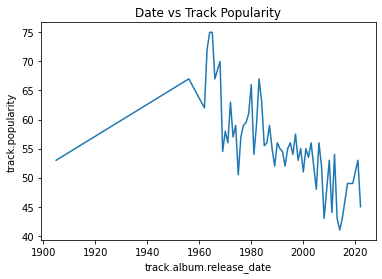

In [8]:
## I will check whether there is a relation between date factor and popularity factors were observed 

df.groupby('track.album.release_date')['track.popularity'].median().plot()
plt.xlabel('track.album.release_date')
plt.ylabel('track.popularity')
plt.title("Date vs Track Popularity")

#Show the mean popularity of songs decrease over time --> people's standard is harder??

### 1.3 Missing Value 

In [9]:
#sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')
df.isna().sum()
##Show no N/A value

track.id                    0
track.name                  1
track.artist                1
track.popularity            0
track.album.id              0
track.album.name            1
track.album.release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

<AxesSubplot:>

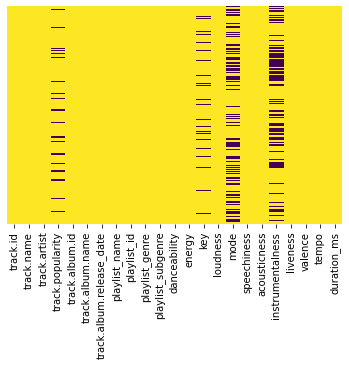

In [10]:
sns.heatmap(df.astype(bool), yticklabels=False, cbar=False, cmap='viridis')

## key: 0 is acceptable because 0 = C 
## mode: 0 is acceptable cause its domain (0,1)
## instrumentalness: acceptable cause the closer the instrumentalness value is to 0, the greater likelihood the track contains vocal content. 



## 2. Feature Engineering

In [11]:
#Convert track.popularity to binary output
#Adding popularity_encoded column which contains the binary 
df['popularity_encoded'] = (df['track.popularity'] > 60).astype(int)
df = df.drop(columns=['track.popularity'])
df.head()

,track.id,track.name,track.artist,track.album.id,track.album.name,track.album.release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_encoded
0,18asYwWugKjjsihZ0YvRxO,The Motto,Tiësto,278z9UXJaMNDH9Bel9uAxV,The Motto,2021,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,...,-4.627,0,0.0435,0.03010,0.000022,0.0901,0.464,117.953,164819,1
1,5K6Ssv4Z3zRvxt0P6EKUAP,Heartbreak Anthem (with David Guetta & Little ...,Galantis,6kBuGNoOGE7uiPhN82dcJ1,Heartbreak Anthem (with David Guetta & Little ...,2021,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,...,-4.878,1,0.1020,0.21600,0.000000,0.0608,0.479,124.111,183726,1
2,73QyyUMMvtNELmULI4FOsp,You for Me,Sigala,2iylTVQEMYGQ9CUgn9MAAT,You for Me,2021,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,...,-1.856,0,0.0426,0.04810,0.000002,0.1910,0.696,126.031,175435,1
3,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),Dua Lipa,04m06KhJUuwe1Q487puIud,Levitating (feat. DaBaby),2020,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,...,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,1
4,79wbJeLkXOlJh4AzaWCWfL,How Will I Know,Whitney Houston,0ieUgrqfmWB4Ywu2CLWNWQ,How Will I Know,2021,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,...,-3.591,1,0.0369,0.17800,0.000003,0.2300,0.656,118.997,213436,1


In [12]:
df['duration_minutes'] = df['duration_ms'] / 60000

In [13]:
df = df.drop('duration_ms', axis=1)

In [14]:
#checking distribution of 0's and 1's
df['popularity_encoded'].value_counts()

0    22401
1    11679
Name: popularity_encoded, dtype: int64

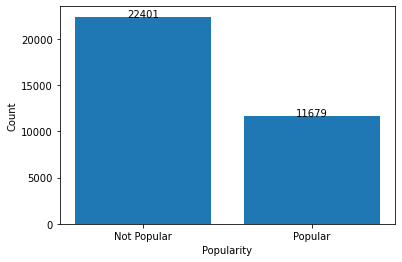

In [15]:
import matplotlib.pyplot as plt

counts = df['popularity_encoded'].value_counts()
labels = ['Not Popular', 'Popular']
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(counts)), labels)
plt.xlabel('Popularity')
plt.ylabel('Count')
for i, v in enumerate(counts):
    plt.text(i, v, str(v), color='black', ha='center')
plt.show()



In [16]:
#Dataset of each genre
df_rap = df[df['playlist_genre']== 'rap']
df_rap.shape

(5953, 23)

In [17]:
df_edm = df[df['playlist_genre']== 'edm']
df_edm.shape

(5940, 23)

In [18]:
df_pop = df[df['playlist_genre']== 'pop']
df_pop.shape

(5909, 23)

In [19]:
df_rock = df[df['playlist_genre']== 'rock']
df_rock.shape

(5389, 23)

In [20]:
df_rb = df[df['playlist_genre']== 'r&b']
df_rb.shape

(5746, 23)

In [21]:
df_latin = df[df['playlist_genre'] == 'latin']
df_latin.shape

(5143, 23)

- Encoding the categorical features

- Scalling on numerical feature

- Scaling on the popularity variable to achieve Normal Distribution¶

In [22]:
df.head()

,track.id,track.name,track.artist,track.album.id,track.album.name,track.album.release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity_encoded,duration_minutes
0,18asYwWugKjjsihZ0YvRxO,The Motto,Tiësto,278z9UXJaMNDH9Bel9uAxV,The Motto,2021,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,...,-4.627,0,0.0435,0.03010,0.000022,0.0901,0.464,117.953,1,2.746983
1,5K6Ssv4Z3zRvxt0P6EKUAP,Heartbreak Anthem (with David Guetta & Little ...,Galantis,6kBuGNoOGE7uiPhN82dcJ1,Heartbreak Anthem (with David Guetta & Little ...,2021,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,...,-4.878,1,0.1020,0.21600,0.000000,0.0608,0.479,124.111,1,3.062100
2,73QyyUMMvtNELmULI4FOsp,You for Me,Sigala,2iylTVQEMYGQ9CUgn9MAAT,You for Me,2021,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,...,-1.856,0,0.0426,0.04810,0.000002,0.1910,0.696,126.031,1,2.923917
3,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),Dua Lipa,04m06KhJUuwe1Q487puIud,Levitating (feat. DaBaby),2020,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,...,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,1,3.384400
4,79wbJeLkXOlJh4AzaWCWfL,How Will I Know,Whitney Houston,0ieUgrqfmWB4Ywu2CLWNWQ,How Will I Know,2021,Dance Pop Hits,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,...,-3.591,1,0.0369,0.17800,0.000003,0.2300,0.656,118.997,1,3.557267


### 2.1 Encoding the categorical fearures

In [23]:
def encoder(df):
    le = LabelEncoder()
    for col in df.columns:
        if df[col].dtypes == 'object':
            df[col] = le.fit_transform(df[col])
            le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
    return df

In [61]:
df_encoded = encoder(df)
df_rap_encoded = encoder(df_rap)
df_edm_encoded = encoder(df_edm)
df_pop_encoded = encoder(df_pop)
df_rock_encoded = encoder(df_rock)
df_latin_encoded = encoder(df_latin)
df_rb_encoded = encoder(df_rb)


In [25]:
df_encoded.head()

,track.id,track.name,track.artist,track.album.id,track.album.name,track.album.release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity_encoded,duration_minutes
0,4359,20729,9232,6280,17057,2021,89,168,2,3,...,-4.627,0,0.0435,0.03010,0.000022,0.0901,0.464,117.953,1,2.746983
1,20286,8694,3377,19859,7294,2021,89,168,2,3,...,-4.878,1,0.1020,0.21600,0.000000,0.0608,0.479,124.111,1,3.062100
2,26839,23842,8209,8064,19538,2021,89,168,2,3,...,-1.856,0,0.0426,0.04810,0.000002,0.1910,0.696,126.031,1,2.923917
3,15651,11914,2617,267,9542,2020,89,168,2,3,...,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,1,3.384400
4,27243,9291,9790,2171,7734,2021,89,168,2,3,...,-3.591,1,0.0369,0.17800,0.000003,0.2300,0.656,118.997,1,3.557267


## 3. Modeling

# Logistic Regression

# RAP

In [26]:
# data splitting, check samples
from sklearn.model_selection import train_test_split
X = df_rap_encoded.drop('popularity_encoded',axis=1)
y = df_rap_encoded['popularity_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(np.mean(y_train), np.mean(y), np.mean(y_test))

0.3564068100358423 0.35410717285402316 0.34721289456010745


In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4464, 22), (1489, 22), (4464,), (1489,))

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 5000],
    'tol': [0.0001, 0.001, 0.01, 0.1]
}

# Create a logistic regression object
lr = LogisticRegression()

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}


In [30]:
print("Accuracy for test set is:", grid_search.score(X_test, y_test))

Accuracy for test set is: 0.6648757555406313


In [31]:
from sklearn.linear_model import LogisticRegression

# Run the Logistic Regression Model: 
## (a) Define function, train the model. Report coefficient
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)
logreg.coef_, logreg.intercept_

## (b) Accuracy
print("Accuracy for test set is:", logreg.score(X_test, y_test))

Accuracy for test set is: 0.648757555406313


In [32]:
# Apply the model on the test data and make a prediction
y_pred= logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
y_test_series = pd.Series(y_test, name='actual')
y_pred_series = pd.Series(y_pred, name='predicted')
combined = pd.concat([y_test_series, y_pred_series], axis=1)
combined = pd.DataFrame({'actual': y_test, 'predicted': y_pred})

In [34]:
print(combined)

       actual  predicted
6043        1          0
7273        1          0
6464        0          0
10053       0          0
8767        0          0
...       ...        ...
10616       1          0
5918        0          0
9922        1          0
10232       0          0
9119        0          0

[1489 rows x 2 columns]


6xgSXClcPJAiohZWl6WgjW	Temptation	DJ Kuba	39	6sQahsQ8JVVi8gdZzzBm4B	Temptation	2020	Electro House 2022	4pVZ70y8vzzkn2GVwQbQw8	edm	electro house	0.689	0.925	2	-3.739	1	0.0414	0.00549	0.799	0.363	0.587	125.056	156495

In [41]:
x_new = [[-1],[-1],[-1],[-1],[-1],[2020],[-1],[-1],[-1],[-1],[0.689],[0.925],[2],[-3.739],[1],[0.0414],[0.00549],[0.799],[0.363],[0.587],[125.056],[156495]]

In [48]:
df_xnew = pd.DataFrame(x_new)
df_xnew =df_xnew.transpose()
new_pred= logreg.predict(df_xnew)
print(new_pred)

[0]


In [47]:
X_test.to_csv("test_set.csv")

In [37]:
combined.to_csv("results_logistic.csv")

# EDM

In [35]:
# data splitting, check samples
from sklearn.model_selection import train_test_split
X = df_edm_encoded.drop('popularity_encoded',axis=1)
y = df_edm_encoded['popularity_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(np.mean(y_train), np.mean(y), np.mean(y_test))

0.20920314253647587 0.21313131313131314 0.2249158249158249


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 5000],
    'tol': [0.0001, 0.001, 0.01, 0.1]
}

# Create a logistic regression object
lr = LogisticRegression()

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}


In [40]:
print("Accuracy for test set is:", grid_search.score(X_test, y_test))

Accuracy for test set is: 0.7811447811447811


In [36]:
from sklearn.linear_model import LogisticRegression

# Run the Logistic Regression Model: 
## (a) Define function, train the model. Report coefficient
logreg = LogisticRegression() 
# if no penalization:
logreg_nopenal = LogisticRegression(penalty = 'none')
logreg.fit(X_train, y_train)
logreg.coef_, logreg.intercept_

## (b) Accuracy
print("Accuracy for test set is:", logreg.score(X_test, y_test))

Accuracy for test set is: 0.7744107744107744


In [37]:
# Apply the model on the test data and make a prediction
y_pred= logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
y_pred_tuned= grid_search.predict(X_test)
y_pred_tuned

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
cm_LR = confusion_matrix(y_test,y_pred)
cm_LR

array([[1151,    0],
       [ 334,    0]])

In [42]:
cm_LR_tuned = confusion_matrix(y_test,y_pred_tuned)
cm_LR_tuned

array([[1145,    6],
       [ 319,   15]])

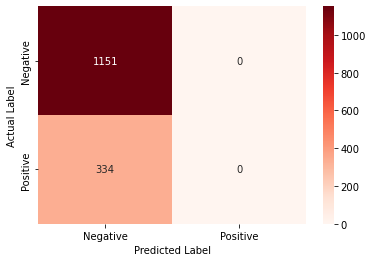

In [53]:
import seaborn as sns
ax = sns.heatmap(cm_LR,annot=True,fmt='d',cmap='Reds')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

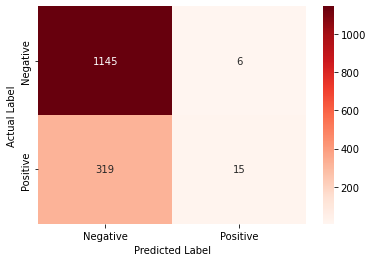

In [43]:
import seaborn as sns
ax = sns.heatmap(cm_LR_tuned,annot=True,fmt='d',cmap='Reds')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

# POP

In [45]:
# data splitting, check samples
from sklearn.model_selection import train_test_split
X = df_pop_encoded.drop('popularity_encoded',axis=1)
y = df_pop_encoded['popularity_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(np.mean(y_train), np.mean(y), np.mean(y_test))

0.42270367862784924 0.42325266542562195 0.4248985115020298


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 5000],
    'tol': [0.0001, 0.001, 0.01, 0.1]
}

# Create a logistic regression object
lr = LogisticRegression()

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}


In [48]:
print("Accuracy for test set is:", grid_search.score(X_test, y_test))

Accuracy for test set is: 0.5940460081190798


In [49]:
from sklearn.linear_model import LogisticRegression

# Run the Logistic Regression Model: 
## (a) Define function, train the model. Report coefficient
logreg = LogisticRegression() 
# if no penalization:
logreg_nopenal = LogisticRegression(penalty = 'none')
logreg.fit(X_train, y_train)
logreg.coef_, logreg.intercept_

## (b) Accuracy
print("Accuracy for test set is:", logreg.score(X_test, y_test))

Accuracy for test set is: 0.5805142083897158


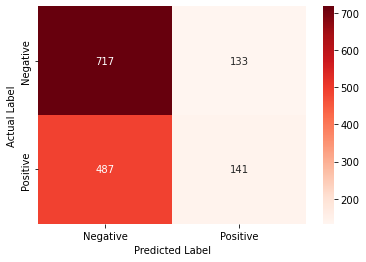

In [50]:
y_pred= logreg.predict(X_test)
cm_LR = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm_LR,annot=True,fmt='d',cmap='Reds')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

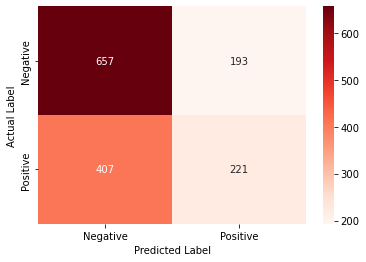

In [51]:
y_pred_tuned= grid_search.predict(X_test)
cm_LR_tuned = confusion_matrix(y_test,y_pred_tuned)
ax = sns.heatmap(cm_LR_tuned,annot=True,fmt='d',cmap='Reds')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

# ROCK

In [52]:
# data splitting, check samples
from sklearn.model_selection import train_test_split
X = df_rock_encoded.drop('popularity_encoded',axis=1)
y = df_rock_encoded['popularity_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(np.mean(y_train), np.mean(y), np.mean(y_test))

0.4135115070527097 0.41566153275190204 0.422106824925816


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 5000],
    'tol': [0.0001, 0.001, 0.01, 0.1]
}

# Create a logistic regression object
lr = LogisticRegression()

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}


In [56]:
print("Accuracy for test set is:", grid_search.score(X_test, y_test))

Accuracy for test set is: 0.6238872403560831


In [57]:
from sklearn.linear_model import LogisticRegression

# Run the Logistic Regression Model: 
## (a) Define function, train the model. Report coefficient
logreg = LogisticRegression() 
# if no penalization:
logreg_nopenal = LogisticRegression(penalty = 'none')
logreg.fit(X_train, y_train)
logreg.coef_, logreg.intercept_

## (b) Accuracy
print("Accuracy for test set is:", logreg.score(X_test, y_test))

Accuracy for test set is: 0.6016320474777448


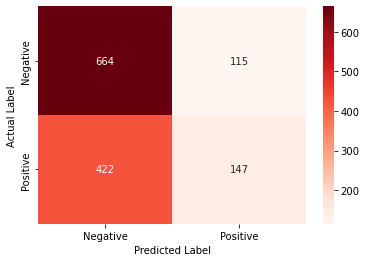

In [54]:
y_pred= logreg.predict(X_test)
cm_LR = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm_LR,annot=True,fmt='d',cmap='Reds')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

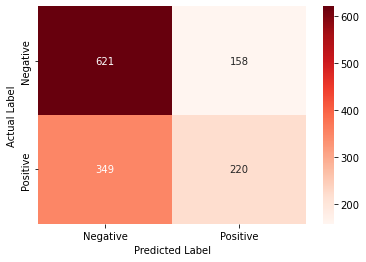

In [58]:
y_pred_tuned= grid_search.predict(X_test)
cm_LR_tuned = confusion_matrix(y_test,y_pred_tuned)
ax = sns.heatmap(cm_LR_tuned,annot=True,fmt='d',cmap='Reds')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

# LATIN

In [59]:
# data splitting, check samples
from sklearn.model_selection import train_test_split
X = df_latin_encoded.drop('popularity_encoded',axis=1)
y = df_latin_encoded['popularity_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(np.mean(y_train), np.mean(y), np.mean(y_test))

0.36868032149338864 0.37137857281742176 0.37947122861586313


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 5000],
    'tol': [0.0001, 0.001, 0.01, 0.1]
}

# Create a logistic regression object
lr = LogisticRegression()

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'C': 1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}


In [63]:
print("Accuracy for test set is:", grid_search.score(X_test, y_test))

Accuracy for test set is: 0.6897356143079316


In [60]:
from sklearn.linear_model import LogisticRegression

# Run the Logistic Regression Model: 
## (a) Define function, train the model. Report coefficient
logreg = LogisticRegression() 
# if no penalization:
logreg_nopenal = LogisticRegression(penalty = 'none')
logreg.fit(X_train, y_train)
logreg.coef_, logreg.intercept_

## (b) Accuracy
print("Accuracy for test set is:", logreg.score(X_test, y_test))

Accuracy for test set is: 0.656298600311042


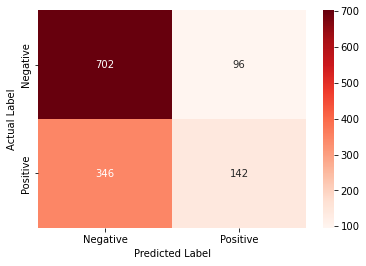

In [64]:
y_pred= logreg.predict(X_test)
cm_LR = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm_LR,annot=True,fmt='d',cmap='Reds')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

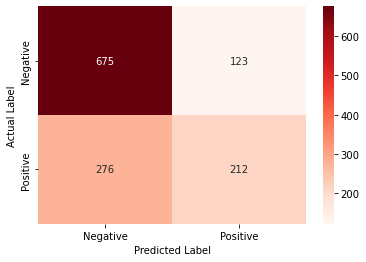

In [65]:
y_pred_tuned= grid_search.predict(X_test)
cm_LR_tuned = confusion_matrix(y_test,y_pred_tuned)
ax = sns.heatmap(cm_LR_tuned,annot=True,fmt='d',cmap='Reds')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

# R&B

In [66]:
# data splitting, check samples
from sklearn.model_selection import train_test_split
X = df_rb_encoded.drop('popularity_encoded',axis=1)
y = df_rb_encoded['popularity_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(np.mean(y_train), np.mean(y), np.mean(y_test))

0.28150382919470873 0.28785241907413855 0.3068893528183716


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 5000],
    'tol': [0.0001, 0.001, 0.01, 0.1]
}

# Create a logistic regression object
lr = LogisticRegression()

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'C': 0.001, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001}


In [70]:
print("Accuracy for test set is:", grid_search.score(X_test, y_test))

Accuracy for test set is: 0.708420320111343


In [67]:
from sklearn.linear_model import LogisticRegression

# Run the Logistic Regression Model: 
## (a) Define function, train the model. Report coefficient
logreg = LogisticRegression() 
# if no penalization:
logreg_nopenal = LogisticRegression(penalty = 'none')
logreg.fit(X_train, y_train)
logreg.coef_, logreg.intercept_

## (b) Accuracy
print("Accuracy for test set is:", logreg.score(X_test, y_test))

Accuracy for test set is: 0.6938065414057063


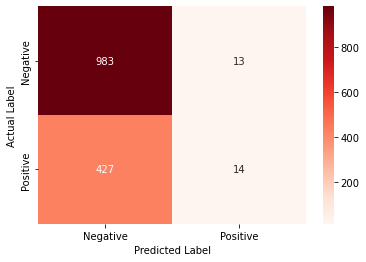

In [68]:
y_pred= logreg.predict(X_test)
cm_LR = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm_LR,annot=True,fmt='d',cmap='Reds')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

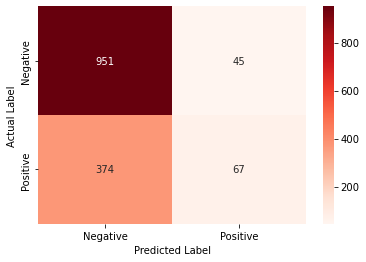

In [71]:
y_pred_tuned= grid_search.predict(X_test)
cm_LR_tuned = confusion_matrix(y_test,y_pred_tuned)
ax = sns.heatmap(cm_LR_tuned,annot=True,fmt='d',cmap='Reds')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

### 3.1 XGBoost


#### a. RAP

In [44]:
# data splitting, check samples
from sklearn.model_selection import train_test_split
X = df_rap_encoded.drop('popularity_encoded',axis=1)
y = df_rap_encoded['popularity_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(np.mean(y_train), np.mean(y), np.mean(y_test))


0.3564068100358423 0.35410717285402316 0.34721289456010745


In [41]:
import xgboost as xgb

model = xgb.XGBClassifier(objective='binary:logistic', max_depth=3)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [42]:
#Probabilities of the positive class for the test set 
y_prob = model.predict_proba(X_test)[:, 1]

In [56]:
y_prob

array([0.71731555, 0.628677  , 0.6649799 , ..., 0.91436404, 0.34285957,
       0.1453023 ], dtype=float32)

In [43]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

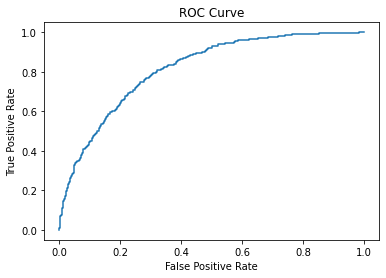

In [44]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [45]:
#Optimal Threshold
youden = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden)]
optimal_threshold

0.3336582

In [53]:
y_pred_xgb = (y_prob >= optimal_threshold).astype(int)

In [54]:
y_test_series = pd.Series(y_test, name='actual')
y_pred_series = pd.Series(y_pred_xgb, name='predicted')
combined = pd.concat([y_test_series, y_pred_series], axis=1)
combined = pd.DataFrame({'actual': y_test, 'predicted': y_pred})

In [55]:
combined.to_csv("results_xgb.csv")

In [72]:
cm_test_xgb = confusion_matrix(y_test,y_pred_xgb)
cm_test_xgb

array([[659, 313],
       [ 99, 418]])

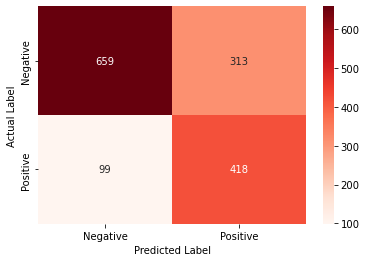

In [73]:
import seaborn as sns
ax = sns.heatmap(cm_test_xgb,annot=True,fmt='d',cmap='Reds')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

In [48]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy for test set is:", accuracy)

Accuracy for test set is: 0.7233042310275353


The F-score is calculated as the number of times a feature is split on across all trees in the model, weighted by the number of training samples that go through those splits. The higher the F-score of a feature, the more important it is in determining the target variable. Therefore, the features with higher F-scores are considered to be more important for the model's prediction.

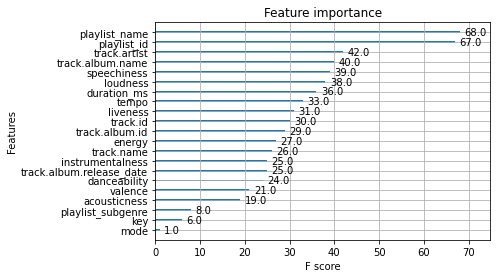

In [49]:
# Plot the feature importance
xgb.plot_importance(model)
plt.show()

#track.artist, speechiness and loudness are importance features

In [79]:
X_new = [[-1],[-1],[-1],[-1],[-1],[2021],[-1],[-1],[-1],[-1],[0.736],[0.704],[3],[-7.409],[0],[0.0615],[0.0203],[0],[0.0501],[0.894],[149.995],[212000]]
df_xnew = pd.DataFrame(X_new)
df_xnew =df_xnew.transpose()
new_pred= logreg.predict(df_xnew)
new_pred

array([0])

### b. EDM 

In [80]:
from sklearn.model_selection import train_test_split
X = df_edm_encoded.drop('popularity_encoded',axis=1)
y = df_edm_encoded['popularity_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(np.mean(y_train), np.mean(y), np.mean(y_test))

import xgboost as xgb

model = xgb.XGBClassifier(objective='binary:logistic', max_depth=3)
model.fit(X_train, y_train)

0.20920314253647587 0.21313131313131314 0.2249158249158249


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

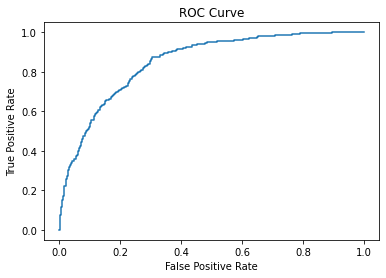

In [81]:
#Probabilities of the positive class for the test set 
y_prob = model.predict_proba(X_test)[:, 1]


#ROC Curve for optimal threshold
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [82]:
#Optimal Threshold
youden = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden)]
optimal_threshold

0.15391494

In [83]:
y_pred = (y_prob >= optimal_threshold).astype(int)

#Confusion matrix
from sklearn.metrics import confusion_matrix
xgb_matrix = confusion_matrix(y_test, y_pred)
print(xgb_matrix)

[[802 349]
 [ 42 292]]


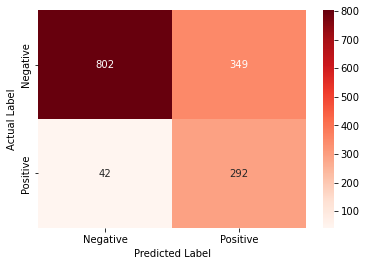

In [86]:
import seaborn as sns
ax = sns.heatmap(xgb_matrix,annot=True,fmt='d',cmap='Reds')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

In [84]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy for test set is:", accuracy)

Accuracy for test set is: 0.7367003367003367


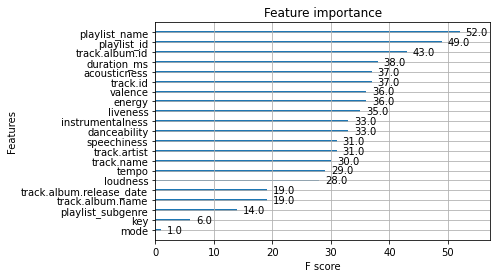

In [85]:
# Plot the feature importance
xgb.plot_importance(model)
plt.show()


#### c. POP

In [87]:
from sklearn.model_selection import train_test_split
X = df_pop_encoded.drop('popularity_encoded',axis=1)
y = df_pop_encoded['popularity_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(np.mean(y_train), np.mean(y), np.mean(y_test))

import xgboost as xgb

model = xgb.XGBClassifier(objective='binary:logistic', max_depth=3)
model.fit(X_train, y_train)

0.42270367862784924 0.42325266542562195 0.4248985115020298


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

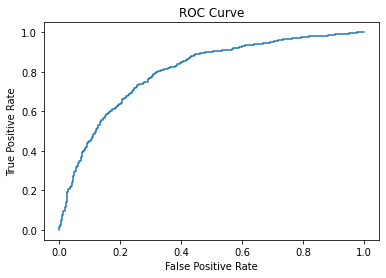

In [88]:
#Probabilities of the positive class for the test set 
y_prob = model.predict_proba(X_test)[:, 1]


#ROC Curve for optimal threshold
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [89]:
#Optimal Threshold
youden = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden)]
optimal_threshold

0.37303033

In [90]:
y_pred = (y_prob >= optimal_threshold).astype(int)

#Confusion matrix
from sklearn.metrics import confusion_matrix
xgb_matrix = confusion_matrix(y_test, y_pred)
print(xgb_matrix)

[[579 271]
 [126 502]]


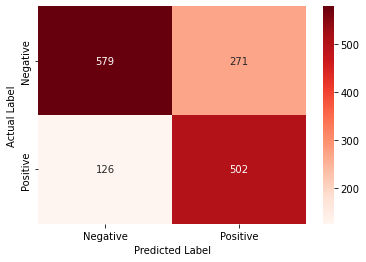

In [91]:
import seaborn as sns
ax = sns.heatmap(xgb_matrix,annot=True,fmt='d',cmap='Reds')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

In [92]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy for test set is:", accuracy)

Accuracy for test set is: 0.7313937753721245


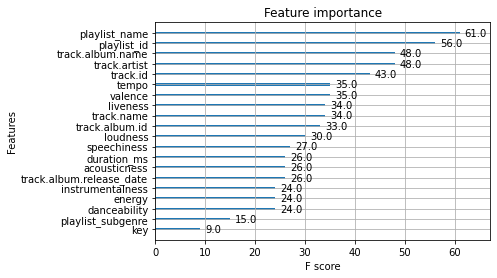

In [93]:
# Plot the feature importance
xgb.plot_importance(model)
plt.show()

#### d. ROCK

In [56]:
from sklearn.model_selection import train_test_split
X = df_rock_encoded.drop('popularity_encoded',axis=1)
y = df_rock_encoded['popularity_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(np.mean(y_train), np.mean(y), np.mean(y_test))

import xgboost as xgb

model = xgb.XGBClassifier(objective='binary:logistic', max_depth=3)
model.fit(X_train, y_train)

0.4135115070527097 0.41566153275190204 0.422106824925816


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

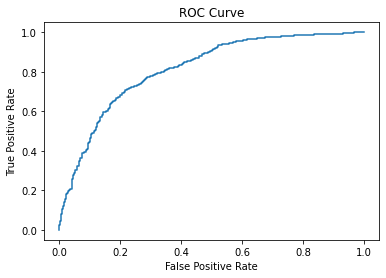

In [57]:
#Probabilities of the positive class for the test set 
y_prob = model.predict_proba(X_test)[:, 1]


#ROC Curve for optimal threshold
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [58]:
#Optimal Threshold
youden = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden)]
optimal_threshold

0.48558706

In [59]:
y_pred = (y_prob >= optimal_threshold).astype(int)

#Confusion matrix
from sklearn.metrics import confusion_matrix
xgb_matrix = confusion_matrix(y_test, y_pred)
print(xgb_matrix)

[[602 177]
 [160 409]]


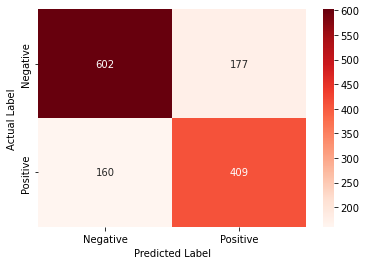

In [60]:
import seaborn as sns
ax = sns.heatmap(xgb_matrix,annot=True,fmt='d',cmap='Reds')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

In [61]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy for test set is:", accuracy)

Accuracy for test set is: 0.75


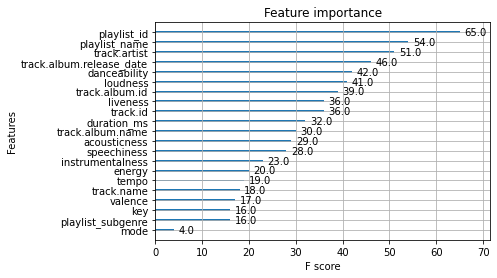

<Figure size 576x576 with 0 Axes>

In [72]:
# Plot the feature importance
xgb.plot_importance(model)
plt.figure(figsize=(8,8))
plt.show()

2QhURnm7mQDxBb5jWkbDug	Don't Panic	Coldplay	70	6ZG5lRT77aJ3btmArcykra	Parachutes	2000	Permanent Wave	7zvWnXxcQeKzDs51SoYlms	rock	permanent wave	0.602	0.612	0	-8.409	1	0.0335	0.206	0.00607	0.107	0.453	122.062	136867

2QjOHCTQ1Jl3zawyYOpxh6	Sweater Weather	The Neighbourhood	94	4xkM0BwLM9H2IUcbYzpcBI	I Love You.	2013	Permanent Wave	7EW3LNVv4JJrw8mMl0uvR5	rock	permanent wave	0.612	0.807	10	-2.81	1	0.0336	0.0495	0.0177	0.101	0.398	124.053	240400

In [69]:
new = [[-1],[-1],[-1],[-1],[-1],[2013],[-1],[-1],[-1],[-1],[0.612],[0.807],[10],[-2.81],[1],[0.0336],[0.0495],[0.0177],[0.101],[0.398],[124.053],[240400]]

In [70]:
df_xnew = pd.DataFrame(new)
df_xnew =df_xnew.transpose()
new_pred= logreg.predict(df_xnew)
new_pred

array([0])

#### e. R&B

In [101]:
from sklearn.model_selection import train_test_split
X = df_rb_encoded.drop('popularity_encoded',axis=1)
y = df_rb_encoded['popularity_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(np.mean(y_train), np.mean(y), np.mean(y_test))

import xgboost as xgb

model = xgb.XGBClassifier(objective='binary:logistic', max_depth=3)
model.fit(X_train, y_train)

0.36868032149338864 0.37137857281742176 0.37947122861586313


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

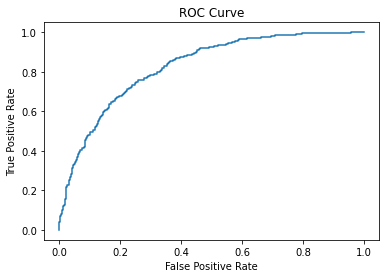

In [102]:
#Probabilities of the positive class for the test set 
y_prob = model.predict_proba(X_test)[:, 1]


#ROC Curve for optimal threshold
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [103]:
#Optimal Threshold
youden = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden)]
optimal_threshold

0.36738536

In [104]:
y_pred = (y_prob >= optimal_threshold).astype(int)

#Confusion matrix
from sklearn.metrics import confusion_matrix
xgb_matrix = confusion_matrix(y_test, y_pred)
print(xgb_matrix)

[[596 202]
 [122 366]]


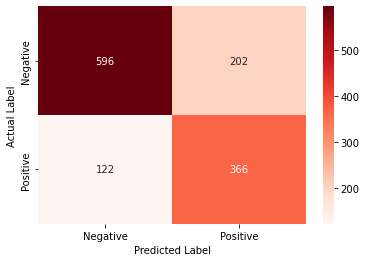

In [107]:
import seaborn as sns
ax = sns.heatmap(xgb_matrix,annot=True,fmt='d',cmap='Reds')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

In [105]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy for test set is:", accuracy)

Accuracy for test set is: 0.7480559875583204


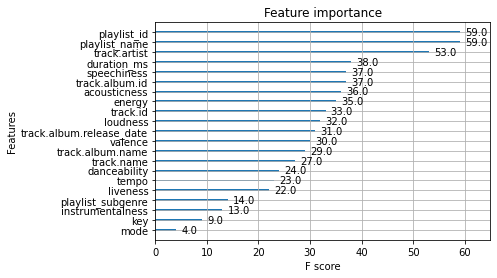

In [106]:
# Plot the feature importance
xgb.plot_importance(model)
plt.show()

#### f. LATIN

In [110]:
from sklearn.model_selection import train_test_split
X = df_latin_encoded.drop('popularity_encoded',axis=1)
y = df_latin_encoded['popularity_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(np.mean(y_train), np.mean(y), np.mean(y_test))

import xgboost as xgb

model = xgb.XGBClassifier(objective='binary:logistic', max_depth=3)
model.fit(X_train, y_train)

0.36868032149338864 0.37137857281742176 0.37947122861586313


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

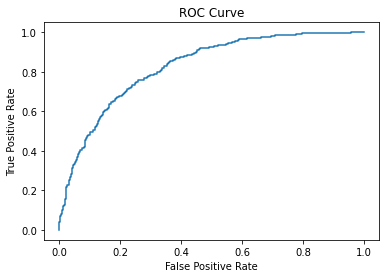

In [111]:
#Probabilities of the positive class for the test set 
y_prob = model.predict_proba(X_test)[:, 1]


#ROC Curve for optimal threshold
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [112]:
#Optimal Threshold
youden = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden)]
optimal_threshold

0.36738536

In [113]:
y_pred = (y_prob >= optimal_threshold).astype(int)

#Confusion matrix
from sklearn.metrics import confusion_matrix
xgb_matrix = confusion_matrix(y_test, y_pred)
print(xgb_matrix)

[[596 202]
 [122 366]]


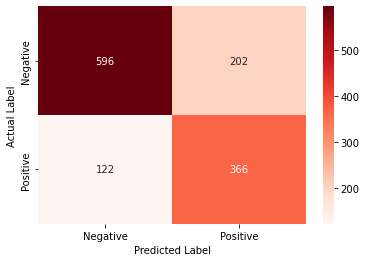

In [116]:
import seaborn as sns
ax = sns.heatmap(xgb_matrix,annot=True,fmt='d',cmap='Reds')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

In [114]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy for test set is:", accuracy)

Accuracy for test set is: 0.7480559875583204


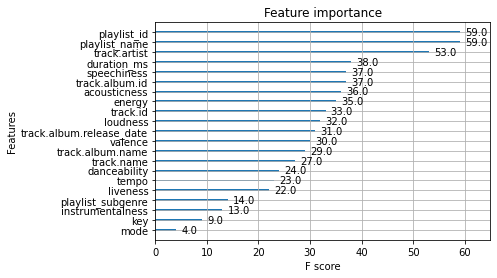

In [115]:
# Plot the feature importance
xgb.plot_importance(model)
plt.show()

## 4. Test Data 

In [117]:
df_encoded.iloc[2]

track.id                     26839.000000
track.name                   23842.000000
track.artist                  8209.000000
track.album.id                8064.000000
track.album.name             19538.000000
track.album.release_date      2021.000000
playlist_name                   89.000000
playlist_id                    168.000000
playlist_genre                   2.000000
playlist_subgenre                3.000000
danceability                     0.733000
energy                           0.886000
key                              2.000000
loudness                        -1.856000
mode                             0.000000
speechiness                      0.042600
acousticness                     0.048100
instrumentalness                 0.000002
liveness                         0.191000
valence                          0.696000
tempo                          126.031000
duration_ms                 175435.000000
popularity_encoded               1.000000
Name: 2, dtype: float64

In [118]:
new_data= {'track.id':[5], 'track.name':[6], 'track.artist':[7], 'track.album.id':[8], 'track.album.name':[9],'track.album.release_date':[2022], 'playlist_name':[10], 'playlist_id':[3], 'playlist_genre': [11], 'playlist_subgenre':[5],'danceability':[0.743],'energy':[0.331],'key' : [0], 'loudness':[-10.857], 'mode':[1], 'speechiness':[0.0785], 'acousticness':[0.475], 'instrumentalness': [0.71], 'liveness' : [0.109], 'valence' : [0.393], 'tempo' : [83.004], 'duration_ms' : [143133]}


In [119]:
type(new_data)

dict

In [120]:
df_new_data = pd.DataFrame.from_dict(new_data)

In [121]:
predictions = model.predict(df_new_data)
predictions

array([0])